In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(os.path.join('train.csv'))
val = pd.read_csv(os.path.join('validation.csv'))
test = pd.read_csv(os.path.join('test.csv'))

In [3]:
train[['bidprice', 'payprice', 'slotprice']].head()

,bidprice,payprice,slotprice
0,238,5,5
1,294,23,0
2,238,24,5
3,300,25,0
4,277,133,133


In [4]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [5]:
"""
Computes some basic statistics based on provided dataset such as Clicks, Imps and CTR.
"""
cols = train[['click', 'advertiser', 'payprice']]
grouped_cols = cols.groupby('advertiser')
new_features = grouped_cols.count()
new_features['Imps'] = new_features['click']

new_features.rename(columns={'click':'Clicks', 'payprice':'Cost'}, inplace = True)

new_features[['Clicks', 'Cost']] = grouped_cols.sum()[['click', 'payprice']]
new_features['Cost'] = new_features['Cost'] / 1000

new_features[['Avg CPM']] = grouped_cols.mean()[['payprice']]


new_features['CTR'] = new_features['Clicks'] / new_features['Imps'] * 100
new_features['eCPC'] = new_features['Cost'] / new_features['Clicks']

new_features = new_features.reindex(sorted(new_features.columns), axis=1)
print(new_features)

              Avg CPM       CTR  Clicks       Cost    Imps        eCPC
advertiser                                                            
1458        68.992646  0.078196     385  33968.736  492353   88.230483
2259        92.974931  0.032168      43  12428.238  133673  289.028791
2261        89.662184  0.032691      36   9873.779  110122  274.271639
2821        89.077922  0.061978     131  18828.044  211366  143.725527
2997        62.800116  0.435489     217   3129.267   49829   14.420585
3358        84.720599  0.076239     202  22447.231  264956  111.124906
3386        76.766320  0.070323     320  34931.823  455041  109.161947
3427        75.616329  0.067526     272  30458.711  402806  111.980555
3476        76.950083  0.060161     187  23918.779  310835  127.907909


In [6]:
set(train.loc[train['advertiser'] == 2997]['useragent'])

{'android_chrome',
 'android_ie',
 'android_maxthon',
 'android_other',
 'android_safari',
 'android_sogou',
 'other_other'}

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


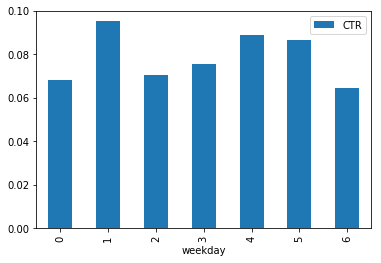

In [7]:
cols = train[['click', 'advertiser', 'weekday']]
grouped_cols = cols.groupby(['advertiser', 'weekday'])
new_features = grouped_cols.sum()
new_features.rename(columns={'click':'Clicks'}, inplace = True)
new_features['Imps'] = grouped_cols.count()['click']
new_features['CTR'] = new_features['Clicks'] / new_features['Imps'] * 100
new_features = new_features.reset_index()

plot_df = new_features.loc[new_features['advertiser'] == 1458]
plot_df.plot(x="weekday", y=["CTR"], kind="bar")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


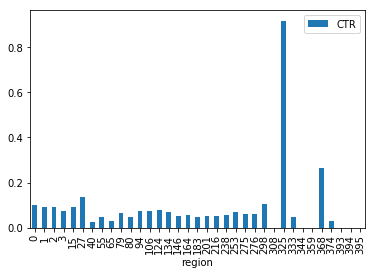

In [8]:
cols = train[['click', 'advertiser', 'region']]
grouped_cols = cols.groupby(['advertiser', 'region'])
new_features = grouped_cols.sum()
new_features.rename(columns={'click':'Clicks'}, inplace = True)
new_features['Imps'] = grouped_cols.count()['click']
new_features['CTR'] = new_features['Clicks'] / new_features['Imps'] * 100
new_features = new_features.reset_index()

plot_df = new_features.loc[new_features['advertiser'] == 3476]
plot_df.plot(x="region", y=["CTR"], kind="bar")
plt.show()

In [11]:
sum(val['bidprice'] >= val['payprice']) \
    / len(val['bidprice']) * 100

100.0